# Get Data and Forming Combinations 

In [3]:
import pandas as pd
import yfinance as yf
from typing import List, Dict, Tuple
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
import os
from statsmodels.tsa.api import AutoReg
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import psycopg2
import time
from datetime import timedelta,datetime
from typing import Callable
import logging
from tabulate import tabulate


In [2]:
from forming_combination.data_handler import DataHandler
from forming_combination.combination_formation import Combination_Formations

In [4]:
stocks=['ACB', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'PNJ', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']
futures='VN30F1M'
start_date='2021-06-01'
end_date='2022-07-31'
etf_list = ['FUEVFVND', 'FUESSVFL', 'E1VFVN30', 'FUEVN100']


# Initialize DataHandler with ETF list and etf_included flag
data_handler = DataHandler(
    futures=futures,
    stocks=stocks, 
    start_date=start_date,
    end_date=end_date,
    etf_list=etf_list,
    etf_included=False,
    use_existing_data=True # Set to False to exclude ETFs entirely
)

# Run the strategy
strategy = Combination_Formations(data_handler)
strategy.run_strategy()
results_df_1, stock_price = strategy.get_results()


In [5]:
results_df_1

,Date,Combination_ID,Residual,Total_Combinations,Num_Stocks,Is_Estimation,Intercept,Beta_SAB,Beta_TPB,Beta_TCB,...,Beta_POW,Beta_VNM,Beta_MBB,Beta_SSI,Beta_PNJ,Beta_GVR,Beta_PDR,Beta_KDH,Beta_BVH,Beta_VJC
0,2021-06-08,1,315.161481,1,3,True,-168.184269,4.803099,68.360858,1.096044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021-06-09,1,319.452549,1,3,True,-168.184269,4.803099,68.360858,1.096044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-06-10,1,324.479266,1,3,True,-168.184269,4.803099,68.360858,1.096044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021-06-11,1,319.244931,1,3,True,-168.184269,4.803099,68.360858,1.096044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021-06-14,1,328.138924,1,3,True,-168.184269,4.803099,68.360858,1.096044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,2022-07-25,30,541.829629,9,5,True,-275.419666,NaN,NaN,NaN,...,NaN,2.8293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2962,2022-07-26,30,543.113886,9,5,False,-275.419666,NaN,NaN,NaN,...,NaN,2.8293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2970,2022-07-27,30,544.158321,8,5,False,-275.419666,NaN,NaN,NaN,...,NaN,2.8293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2978,2022-07-28,30,543.302543,8,5,False,-275.419666,NaN,NaN,NaN,...,NaN,2.8293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# results_df_1.to_csv('draft\\results.csv', index=False)

# Generating Trading Signal 

##( Chưa có add in cái cơ sở bị lock 2 ngày), combination khi mua sẽ bị lock 2 ngày rồi mới coi behvior của s-score

In [6]:
from signal_generation.signal_generator import process_results_df

In [7]:
results_df, positions_df, trading_log = process_results_df(results_df_1,stock_price,stocks,tier=4)

In [8]:
positions_df

,Total_Port_Trading,VN30F1M_Position,ACB_Position,BID_Position,BVH_Position,CTG_Position,FPT_Position,GAS_Position,GVR_Position,HDB_Position,...,Abs_TCB,Abs_TPB,Abs_VCB,Abs_VHM,Abs_VIC,Abs_VJC,Abs_VNM,Abs_VPB,Abs_VRE,Abs_Stocks
2021-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
positions_df.to_csv('positions.csv')

# Porfolio Management


In [9]:
from backtesting.port_mana import PortfolioManager

In [10]:
pm = PortfolioManager()
asset_df, detail_df, trading_log_df,total_fee = pm.run_backtest(positions_df, stock_price)

In [11]:
detail_df

,balance,vn30f1m_notional,abs_stocks,cash,fee,vn30f1m_pct_change,stock_pct_change,profit_stocks_today,profit_futures_today,cumulative_profit_stocks,...,STB_weight,TCB_weight,TPB_weight,VCB_weight,VHM_weight,VIC_weight,VJC_weight,VNM_weight,VPB_weight,VRE_weight
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,1.000000e+09,0.0,0.0,1.000000e+09,0.0,-0.004118,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01,1.000000e+09,0.0,0.0,1.000000e+09,0.0,0.001121,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-06,1.000000e+09,0.0,0.0,1.000000e+09,0.0,0.011200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-07,1.000000e+09,0.0,0.0,1.000000e+09,0.0,-0.002492,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-08,1.000000e+09,0.0,0.0,1.000000e+09,0.0,-0.006870,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,8.711223e+08,0.0,0.0,8.711223e+08,0.0,-0.003019,0.0,0.0,-0.0,-45972901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-26,8.711223e+08,0.0,0.0,8.711223e+08,0.0,-0.002455,0.0,0.0,-0.0,-45972901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-27,8.711223e+08,0.0,0.0,8.711223e+08,0.0,0.003364,0.0,0.0,0.0,-45972901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
returns=pd.DataFrame(index=detail_df.index, columns=['returns'])
returns['returns'] = detail_df['balance'].pct_change().fillna(0.0)

In [82]:
asset_df.to_csv('portfolio\\asset.csv')
detail_df.to_csv('portfolio\\detail1.csv')
trading_log_df.to_csv('portfolio\\trading_log.csv')

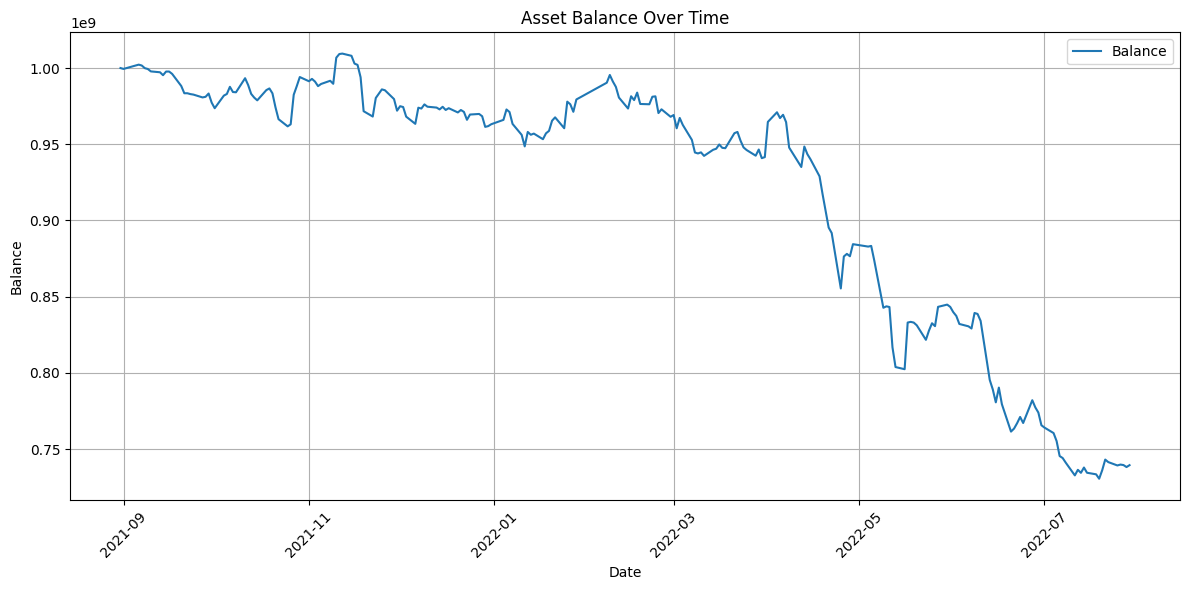

In [10]:
def plot_asset_balance(asset_df: pd.DataFrame):
    """
    Plots the 'balance' column of the given asset DataFrame using matplotlib.

    Args:
        asset_df (pd.DataFrame): DataFrame containing a 'balance' column and a 'Date' index.
    """
    if 'balance' not in asset_df.columns:
        print("Error: 'balance' column not found in the DataFrame.")
        return

    if not isinstance(asset_df.index, pd.DatetimeIndex):
        print("Error: DataFrame index is not a DatetimeIndex. Ensure 'Date' is the index.")
        return

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    plt.plot(asset_df.index, asset_df['balance'], label='Balance')
    plt.title('Asset Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.legend()
    plt.grid(True)  # Add grid lines for better readability
    plt.xticks(rotation=45) #rotate x axis labels
    plt.tight_layout() #avoid labels being cut off
    plt.show()


plot_asset_balance(asset_df)

# Real simulation

In [14]:
# Input
estimation_window = 60
min_trading_day=45
max_cluster=10
top_stocks=5
correlation_threshold=0.6
residual_threshold=0.3
improvement_threshold=0.03

ou_window=estimation_window
tier=1
first_allocation=0.4    
adding_allocation=0.5


In [15]:
def generate_periods_df(vn30_stocks, start_date, end_date, window=estimation_window):
    """Generate a DataFrame of trading periods based on VN30 stock data, with the first start_date as specified.

    Args:
        vn30_stocks (pd.DataFrame): DataFrame with 'Date' index and 'Stock' column from get_vn30.
        start_date (str): Desired start date for the first period in 'YYYY-MM-DD' format.
        end_date (str): End date for the last period in 'YYYY-MM-DD' format.
        window (int): Number of days to subtract from rebalancing date for start_date. Defaults to 60.

    Returns:
        pd.DataFrame: DataFrame with columns ['stocks_list', 'start_date', 'end_date'],
                      where the first start_date matches the input start_date.

    Raises:
        ValueError: If vn30_stocks is empty.
    """
    if vn30_stocks.empty:
        raise ValueError("No data found in vn30_stocks.")

    # Group stocks by date to get the list of stocks for each rebalancing date
    grouped = vn30_stocks.groupby("Date")["Stock"].apply(list)
    date_stock_pairs = [(date, stocks) for date, stocks in grouped.items()]

    # Generate periods
    periods = []
    for i, (current_date, current_stocks) in enumerate(date_stock_pairs):
        # Calculate start_date
        start_date_calc = current_date - timedelta(days=window)

        # Override the first start_date to match the input start_date
        if i == 0:
            period_start_date = pd.to_datetime(start_date)
        else:
            period_start_date = start_date_calc

        # Determine end_date
        if i < len(date_stock_pairs) - 1:
            next_date = date_stock_pairs[i + 1][0]
            end_date_calc = next_date - timedelta(days=1)
        else:
            end_date_calc = pd.to_datetime(
                end_date
            )  # Use the provided end_date for the last period

        # Format dates as strings
        start_date_str = period_start_date.strftime("%Y-%m-%d")
        end_date_str = end_date_calc.strftime("%Y-%m-%d")

        periods.append(
            {
                "stocks_list": current_stocks,  # No ETFs added
                "start_date": start_date_str,
                "end_date": end_date_str,
            }
        )

    # Convert to DataFrame
    periods_df = pd.DataFrame(periods)
    return periods_df


def run_backtest_for_periods(
    periods_df, futures="VN30F1M", etf_list=None, etf_included=False,
    estimation_window=estimation_window, max_cluster=max_cluster,
    top_stocks=top_stocks, correlation_threshold=correlation_threshold,
    residual_threshold=residual_threshold, improvement_threshold=improvement_threshold
    
):
    """Run a backtest across all periods specified in periods_df.

    Args:
        periods_df (pd.DataFrame): DataFrame with ['stocks_list', 'start_date', 'end_date'] columns.
        futures (str): Futures symbol for backtesting. Defaults to 'VN30F1M'.
        etf_list (list): List of ETF ticker symbols to pass to DataHandler. Defaults to None.
        etf_included (bool): Whether to include ETFs in DataHandler. Defaults to False.

    Returns:
        tuple: (pd.DataFrame, pd.DataFrame)
            - combined_returns_df: Time series of daily returns.
            - combined_detail_df: Aggregated backtest details.
    """
    all_returns_dfs = []
    all_detail_dfs = []

    # Run backtest for each period
    for period_idx, period in periods_df.iterrows():
        active_stocks = period["stocks_list"]
        start_date = period["start_date"]
        end_date = period["end_date"]

        print(
            f"Running backtest for period {period_idx + 1}: {start_date} to {end_date} "
            f"with stocks: {active_stocks}"
        )

        # Initialize and run strategy with etf_list and etf_included
        data_handler = DataHandler(
            futures=futures,
            stocks=active_stocks,
            start_date=start_date,
            end_date=end_date,
            etf_list=etf_list,
            etf_included=etf_included,
            estimation_window=estimation_window,
            max_clusters=max_cluster
        )
        strategy = StatArbStrategy(data_handler)
        strategy.run_strategy()
        results_df_1, stock_price = strategy.get_results()

        # Process results
        results_df, positions_df, trading_log = process_results_df(
            results_df_1, stock_price, stocks=active_stocks
        )

        # Run backtest
        pm = PortfolioManager()
        asset_df, detail_df, trading_log_df = pm.run_backtest(positions_df, stock_price)

        # Compute and store returns
        returns_df = asset_df["balance"].pct_change().fillna(0).to_frame(name="returns")
        all_returns_dfs.append(returns_df)
        all_detail_dfs.append(detail_df)

    # Aggregate results
    combined_returns_df = pd.concat(all_returns_dfs).sort_index()
    combined_returns_df = combined_returns_df[
        ~combined_returns_df.index.duplicated(keep="first")
    ]

    combined_detail_df = pd.concat(all_detail_dfs).sort_index()
    combined_detail_df = combined_detail_df[
        ~combined_detail_df.index.duplicated(keep="first")
    ]

    return combined_returns_df, combined_detail_df

In [16]:
vn30_stocks=get_vn30('2021-06-01', '2025-01-10')
vn30_stocks.index = pd.to_datetime(vn30_stocks.index)

# Step 1: Generate the periods DataFrame with ETFs
etfs_list = [ 'FUEVFVND', 'FUESSVFL', 'E1VFVN30', 'FUEVN100']



In [17]:
start_date='2021-06-01'
end_date='2024-01-01'
periods_df = generate_periods_df(vn30_stocks, 
                                 start_date, 
                                 end_date, 
                                 window=60)

In [18]:
periods_df

,stocks_list,start_date,end_date
0,"[ACB, BID, BVH, CTG, FPT, GAS, GVR, HDB, HPG, ...",2021-06-01,2022-07-31
1,"[ACB, BID, BVH, CTG, FPT, GAS, GVR, HDB, HPG, ...",2022-06-02,2023-02-05
2,"[ACB, BCM, BID, BVH, CTG, FPT, GAS, GVR, HDB, ...",2022-12-08,2023-08-06
3,"[ACB, BCM, BID, BVH, CTG, FPT, GAS, GVR, HDB, ...",2023-06-08,2024-01-01


In [9]:
# Step 2: Run the backtest using the periods DataFrame
combined_returns_df, combined_detail_df = run_backtest_for_periods(
    periods_df=periods_df,
    futures='VN30F1M',
    etf_list=etfs_list,
    etf_included=False
)

Running backtest for period 1: 2021-06-01 to 2022-07-31 with stocks: ['ACB', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'PNJ', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']

=== New Combination 1 at 2021-08-31 ===
VN30F1M = -168.184 + 4.803*SAB + 68.361*TPB + 1.096*TCB

=== New Combination 2 at 2021-09-14 ===
VN30F1M = -83.201 + 11.706*TCB + 23.085*PLX

=== New Combination 3 at 2021-09-24 ===
VN30F1M = -211.226 + 33.562*BID + 11.469*HPG + 1.070*PLX

=== New Combination 4 at 2021-09-30 ===
VN30F1M = 215.870 + 5.898*NVL + 12.253*CTG + 7.532*PLX + 3.892*VRE + 6.023*STB + 8.548*TCB

=== New Combination 5 at 2021-11-11 ===
VN30F1M = -156.143 + 0.903*MSN + 3.314*VIC + 2.862*VRE + 1.057*MWG + 1.287*VHM + 10.330*VPB + 7.312*HPG + 7.952*HDB + 1.972*CTG

=== New Combination 6 at 2021-12-28 ===
VN30F1M = 399.657 + 4.705*VCB + 21.776*VPB + 14.406*FPT + 5.433*POW + 1.994*VRE + 3.367*VHM

=== N

C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:175: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions_df = positions_df.fillna(0.0)
C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:184: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  positions_df.loc[date, 'Active_Combination_IDs'] = str(active_ids)


Running backtest for period 2: 2022-06-02 to 2023-02-05 with stocks: ['ACB', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']

=== New Combination 1 at 2022-08-30 ===
VN30F1M = -10.698 + 8.387*FPT + 1.623*BVH + 8.180*HDB + 8.187*TCB + 10.295*VPB + 0.939*TPB + 0.228*CTG + 8.791*HPG

=== New Combination 2 at 2022-09-07 ===
VN30F1M = -139.124 + 14.772*MBB + 13.830*FPT + 0.167*STB + 1.118*SSI

=== New Combination 3 at 2022-09-13 ===
VN30F1M = 110.165 + 30.239*HDB + 56.323*POW + 3.903*BVH

=== New Combination 4 at 2022-09-13 ===
VN30F1M = -219.958 + 11.547*POW + 38.482*HDB + 5.977*FPT

=== New Combination 5 at 2023-01-11 ===
VN30F1M = 35.946 + 4.419*ACB + 0.509*BID + 7.373*GAS + 24.434*HPG

=== New Combination 6 at 2023-01-12 ===
VN30F1M = -215.182 + 21.200*TPB + 45.219*VIB

=== New Combination 7 at 2023-01-13 ===
VN30F1M = 73.196 + 2.852*

C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:175: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions_df = positions_df.fillna(0.0)
C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:184: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  positions_df.loc[date, 'Active_Combination_IDs'] = str(active_ids)


Running backtest for period 3: 2022-12-08 to 2023-08-06 with stocks: ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'NVL', 'PDR', 'PLX', 'POW', 'SAB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']

=== New Combination 1 at 2023-04-05 ===
VN30F1M = 149.863 + 3.218*VNM + 37.494*GVR + 1.207*TPB + 7.787*VIC

=== New Combination 2 at 2023-04-18 ===
VN30F1M = 264.691 + 7.355*BVH + 23.404*TPB + 18.589*GVR + 7.529*VIC

=== New Combination 3 at 2023-04-24 ===
VN30F1M = 177.450 + 12.593*BID + 43.429*GVR + 1.081*VIC + 5.641*NVL + 0.728*VNM

=== New Combination 4 at 2023-04-27 ===
VN30F1M = -151.039 + 28.587*VIB + 15.916*CTG + 4.240*PDR + 0.898*VHM

=== New Combination 5 at 2023-04-28 ===
VN30F1M = 250.885 + 55.762*TPB + 1.666*BID + 1.626*VIB + 4.674*FPT + 4.385*VIC

=== New Combination 6 at 2023-05-15 ===
VN30F1M = 16.575 + 50.690*VIB + 5.854*BID + 15.038*PDR

=== New Combination 7 at 2023-06-05 ===
VN30F1M = 170.7

C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:175: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions_df = positions_df.fillna(0.0)
C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:184: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  positions_df.loc[date, 'Active_Combination_IDs'] = str(active_ids)


Running backtest for period 4: 2023-06-08 to 2025-01-01 with stocks: ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'PLX', 'POW', 'SAB', 'SHB', 'SSB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']

=== New Combination 1 at 2023-09-05 ===
VN30F1M = 101.600 + 7.561*POW + 41.279*VRE

=== New Combination 2 at 2023-10-04 ===
VN30F1M = 276.688 + 3.172*STB + 11.710*BVH + 53.650*TCB

=== New Combination 3 at 2023-10-09 ===
VN30F1M = 304.154 + 16.836*SSB + 67.140*TCB

=== New Combination 4 at 2023-11-17 ===
VN30F1M = 70.143 + 3.552*PLX + 10.997*BVH + 10.559*GVR + 28.543*TCB

=== New Combination 5 at 2023-12-04 ===
VN30F1M = -158.495 + 30.113*VIB + 5.167*GAS + 6.096*GVR

=== New Combination 6 at 2023-12-05 ===
VN30F1M = -68.935 + 12.149*GVR + 24.738*MBB + 28.827*TCB

=== New Combination 7 at 2023-12-05 ===
VN30F1M = -75.117 + 17.082*BVH + 8.377*VIC

=== New Combination 8 at 2023-12-07 ===
VN30F1M = 87.888 + 34.432

C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:175: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions_df = positions_df.fillna(0.0)
C:\Users\caoqu\AppData\Local\Temp\ipykernel_1000\3365593049.py:184: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  positions_df.loc[date, 'Active_Combination_IDs'] = str(active_ids)


In [17]:
combined_detail_df.to_csv('portfolio\\detail_combined.csv')

# Evaluation

In [25]:
def calculate_metrics(returns_df, risk_free_rate=0.05, trading_day=252, freq="D"):
    """Calculate performance metrics, plot cumulative returns, and drawdown for portfolio returns vs a benchmark.

    Args:
        returns_df (pd.DataFrame): Portfolio returns with 'Date' index and 'returns' column.
        benchmark_df (pd.DataFrame): Benchmark data with 'Date' index and 'price' column.
        risk_free_rate (float): Annual risk-free rate. Defaults to 0.05.
        trading_day (int): Number of trading days per year for annualization. Defaults to 252.
        freq (str): Frequency of the data ('D' for daily). Defaults to 'D'.

    Returns:
        pd.DataFrame: Metrics for both Strategy and VN30, with percentages where applicable.

    Raises:
        ValueError: If returns_df or benchmark_df is empty, or if required columns are missing.
    """
    # Validate inputs
    if returns_df.empty:
        raise ValueError("returns_df is empty.")

    
    # Ensure returns_df has 'returns' column
    if 'returns' not in returns_df.columns:
        raise ValueError("returns_df must contain a 'returns' column.")
    
    # Ensure benchmark_df has 'price' column
    # Get the date range from returns_df
    start = returns_df.index[0].strftime('%Y-%m-%d')
    end = returns_df.index[-1].strftime('%Y-%m-%d')

    # Fetch benchmark data using get_etf_price
    benchmark_df = get_etf_price('VN30', start, end)
    benchmark_df.set_index('datetime', inplace=True)
    benchmark_df.index = pd.to_datetime(benchmark_df.index)  # Ensure index is datetime
    
    # Ensure benchmark_df has the expected columns and index
    if 'price' not in benchmark_df.columns:
        raise ValueError("Benchmark DataFrame must contain a 'price' column.") # Ensure index is datetime

    # Ensure datetime indices
    returns_df = returns_df.copy()
    returns_df.index = pd.to_datetime(returns_df.index)
    benchmark_df = benchmark_df.copy()
    benchmark_df.index = pd.to_datetime(benchmark_df.index)

    # Rename 'returns' to 'Asset' for consistency
    returns_df = returns_df.rename(columns={'returns': 'Asset'})
    
    # Align benchmark_df to the exact dates of returns_df
    benchmark_df = benchmark_df.reindex(returns_df.index, method='ffill')
    benchmark_df = benchmark_df.rename(columns={'price': 'Close'})
    
    # Calculate returns for benchmark
    ret_bench = benchmark_df["Close"].pct_change().fillna(0)

    # Concatenate asset and benchmark returns for beta calculation
    join = pd.concat((returns_df['Asset'], ret_bench), axis=1).dropna()
    join.columns = ['Asset', 'Close']

    # Compute time length in years
    start = returns_df.index[0].strftime('%Y-%m-%d')
    end = returns_df.index[-1].strftime('%Y-%m-%d')
    time_length = (datetime.strptime(end, '%Y-%m-%d') - datetime.strptime(start, '%Y-%m-%d')).days / 365.25

    # Cumulative returns for the strategy
    cum_rets = (1 + returns_df['Asset']).cumprod()
    hpr_strategy = cum_rets.iloc[-1] - 1  # HPR for strategy

    # Cumulative returns for the benchmark
    cum_rets_market = (1 + ret_bench).cumprod()
    hpr_benchmark = cum_rets_market.iloc[-1] - 1  # HPR for benchmark

    # Excess HPR
    excess_hpr = hpr_strategy - hpr_benchmark

    # Annualized returns
    annual_stock_return = (1 + hpr_strategy) ** (1 / time_length) - 1
    annual_market_return = (1 + hpr_benchmark) ** (1 / time_length) - 1
    annual_excess_return = annual_stock_return - annual_market_return

    # Compute Beta
    cov = np.cov(join['Asset'], join['Close'])[0][1]
    var = np.var(join['Close'])
    beta = cov / var if var != 0 else np.nan

    # Compute Alpha
    alpha = annual_stock_return - beta * annual_market_return if not np.isnan(beta) else np.nan

    # Volatility
    std_strategy = returns_df['Asset'].std() * np.sqrt(trading_day)
    std_benchmark = ret_bench.std() * np.sqrt(trading_day)

    # Sharpe Ratio (not in percentage)
    sharpe_strategy = (annual_stock_return - risk_free_rate) / std_strategy if std_strategy != 0 else np.nan
    sharpe_benchmark = (annual_market_return - risk_free_rate) / std_benchmark if std_benchmark != 0 else np.nan

    # Sortino Ratio (not in percentage)
    downward_strategy = returns_df['Asset'][returns_df['Asset'] < 0]
    std_downward_strategy = downward_strategy.std() * np.sqrt(trading_day)
    sortino_strategy = annual_stock_return / std_downward_strategy if std_downward_strategy != 0 else np.nan

    downward_benchmark = ret_bench[ret_bench < 0]
    std_downward_benchmark = downward_benchmark.std() * np.sqrt(trading_day)
    sortino_benchmark = annual_market_return / std_downward_benchmark if std_downward_benchmark != 0 else np.nan

    # Information Ratio (not in percentage)
    excess_returns = returns_df['Asset'] - ret_bench
    tracking_error = excess_returns.std() * np.sqrt(trading_day)
    information_ratio = annual_excess_return / tracking_error if tracking_error != 0 else np.nan

    # Maximum Drawdown
    running_max_strategy = np.maximum.accumulate(cum_rets.dropna())
    running_max_strategy[running_max_strategy < 1] = 1
    drawdown_strategy = (cum_rets / running_max_strategy - 1)
    max_drawdown_strategy = -drawdown_strategy.min()

    running_max_benchmark = np.maximum.accumulate(cum_rets_market.dropna())
    running_max_benchmark[running_max_benchmark < 1] = 1
    drawdown_benchmark = (cum_rets_market / running_max_benchmark - 1)
    max_drawdown_benchmark = -drawdown_benchmark.min()

    # Longest Drawdown (in days)
    in_drawdown_strategy = cum_rets < running_max_strategy
    drawdown_periods_strategy = []
    start = None
    for i, is_dd in enumerate(in_drawdown_strategy):
        if is_dd and start is None:
            start = i
        elif not is_dd and start is not None:
            drawdown_periods_strategy.append(i - start)
            start = None
    if start is not None:
        drawdown_periods_strategy.append(i - start + 1)
    longest_drawdown_strategy = max(drawdown_periods_strategy) if drawdown_periods_strategy else 0

    in_drawdown_benchmark = cum_rets_market < running_max_benchmark
    drawdown_periods_benchmark = []
    start = None
    for i, is_dd in enumerate(in_drawdown_benchmark):
        if is_dd and start is None:
            start = i
        elif not is_dd and start is not None:
            drawdown_periods_benchmark.append(i - start)
            start = None
    if start is not None:
        drawdown_periods_benchmark.append(i - start + 1)
    longest_drawdown_benchmark = max(drawdown_periods_benchmark) if drawdown_periods_benchmark else 0

    # Compute VaR and cVaR for strategy
    theta = 0.01
    n = 100000
    simulations_strategy = np.random.normal(annual_stock_return, std_strategy, size=n)
    vec_strategy = pd.DataFrame(simulations_strategy, columns=["Simulations"])
    var_strategy = -vec_strategy.sort_values(by="Simulations").iloc[int(n * theta)].values[0]
    cvar_strategy = -vec_strategy.sort_values(by="Simulations").iloc[0:int(n * theta)].mean().values[0]

    # Compute VaR and cVaR for benchmark
    simulations_benchmark = np.random.normal(annual_market_return, std_benchmark, size=n)
    vec_benchmark = pd.DataFrame(simulations_benchmark, columns=["Simulations"])
    var_benchmark = -vec_benchmark.sort_values(by="Simulations").iloc[int(n * theta)].values[0]
    cvar_benchmark = -vec_benchmark.sort_values(by="Simulations").iloc[0:int(n * theta)].mean().values[0]

    # Compile metrics into a DataFrame
    metrics_data = {
        'HPR (%)': [f"{hpr_strategy * 100:.2f}%", f"{hpr_benchmark * 100:.2f}%"],
        'Excess HPR (%)': [f"{excess_hpr * 100:.2f}%", "-"],
        'Annual Return (%)': [f"{annual_stock_return * 100:.2f}%", f"{annual_market_return * 100:.2f}%"],
        'Annual Excess Return (%)': [f"{annual_excess_return * 100:.2f}%", "-"],
        'Volatility (%)': [f"{std_strategy * 100:.2f}%", f"{std_benchmark * 100:.2f}%"],
        'Maximum Drawdown (%)': [f"{max_drawdown_strategy * 100:.2f}%", f"{max_drawdown_benchmark * 100:.2f}%"],
        'Longest Drawdown (days)': [f"{longest_drawdown_strategy:.2f}", f"{longest_drawdown_benchmark:.2f}"],
        'Sharpe Ratio': [f"{sharpe_strategy:.2f}", f"{sharpe_benchmark:.2f}"],
        'Sortino Ratio': [f"{sortino_strategy:.2f}", f"{sortino_benchmark:.2f}"],
        'Information Ratio': [f"{information_ratio:.2f}", "-"],
        'Beta': [f"{beta:.2f}", "-"],
        'Alpha (%)': [f"{alpha * 100:.2f}%", "-"],
        'VaR (%)': [f"{var_strategy * 100:.2f}%", f"{var_benchmark * 100:.2f}%"],
        'cVaR (%)': [f"{cvar_strategy * 100:.2f}%", f"{cvar_benchmark * 100:.2f}%"],
        'VaR/cVaR': [f"{(cvar_strategy / var_strategy if var_strategy != 0 else np.nan):.2f}", f"{(cvar_benchmark / var_benchmark if var_benchmark != 0 else np.nan):.2f}"]
    }

    metrics_df = pd.DataFrame(metrics_data, index=['Strategy', 'VN30'])

    # Prepare data for vertical table
    table_data = []
    for metric in metrics_data.keys():
        table_data.append([metric, metrics_df.loc['Strategy', metric], metrics_df.loc['VN30', metric]])

    # Print metrics in a vertical table format using tabulate
    print("\nMetrics for Strategy and VN30 Benchmark\n" + "="*40)
    print(tabulate(table_data, headers=['Metric', 'Strategy', 'VN30'], tablefmt='psql', stralign='left'))

    # Plotting

    return metrics_df

In [13]:
def calculate_monthly_returns(returns_df):
    """Calculate monthly returns from a time series of daily returns.

    Args:
        returns_df (pd.DataFrame): Portfolio returns with 'Date' index and 'returns' column.

    Returns:
        pd.DataFrame: Monthly returns with 'Year', 'Month', and 'Monthly Return' columns.
    """
    if returns_df.empty:
        raise ValueError("returns_df is empty.")
    
    if 'returns' not in returns_df.columns:
        raise ValueError("returns_df must contain a 'returns' column.")

    # Ensure datetime index
    returns_df = returns_df.copy()
    returns_df.index = pd.to_datetime(returns_df.index)

    # Add Year and Month columns for grouping
    returns_df['Year'] = returns_df.index.year
    returns_df['Month'] = returns_df.index.month

    # Calculate monthly returns
    monthly_returns = []
    for (year, month), group in returns_df.groupby(['Year', 'Month']):
        # Cumulative return for the month
        cum_return = (1 + group['returns']).prod() - 1
        monthly_returns.append({
            'Year': year,
            'Month': month,
            'Monthly Return': cum_return
        })

    # Convert to DataFrame
    monthly_df = pd.DataFrame(monthly_returns)
    monthly_df = monthly_df.sort_values(['Year', 'Month'])
    return monthly_df


def calculate_yearly_returns(returns_df):
    """Calculate yearly returns from a time series of daily returns.

    Args:
        returns_df (pd.DataFrame): Portfolio returns with 'Date' index and 'returns' column.

    Returns:
        pd.DataFrame: Yearly returns with 'Year' and 'Yearly Return' columns.
    """
    if returns_df.empty:
        raise ValueError("returns_df is empty.")
    
    if 'returns' not in returns_df.columns:
        raise ValueError("returns_df must contain a 'returns' column.")

    # Ensure datetime index
    returns_df = returns_df.copy()
    returns_df.index = pd.to_datetime(returns_df.index)

    # Add Year column for grouping
    returns_df['Year'] = returns_df.index.year

    # Calculate yearly returns
    yearly_returns = []
    for year, group in returns_df.groupby('Year'):
        # Cumulative return for the year
        cum_return = (1 + group['returns']).prod() - 1
        yearly_returns.append({
            'Year': year,
            'Yearly Return': cum_return
        })

    # Convert to DataFrame
    yearly_df = pd.DataFrame(yearly_returns)
    yearly_df = yearly_df.sort_values('Year')
    return yearly_df


In [26]:
calculate_metrics(returns, risk_free_rate=0.05)


Metrics for Strategy and VN30 Benchmark
+--------------------------+------------+---------+
| Metric                   | Strategy   | VN30    |
|--------------------------+------------+---------|
| HPR (%)                  | -26.05%    | -13.77% |
| Excess HPR (%)           | -12.29%    | -       |
| Annual Return (%)        | -28.25%    | -15.03% |
| Annual Excess Return (%) | -13.22%    | -       |
| Volatility (%)           | 14.19%     | 20.68%  |
| Maximum Drawdown (%)     | 27.63%     | 23.11%  |
| Longest Drawdown (days)  | 176.00     | 167.00  |
| Sharpe Ratio             | -2.34      | -0.97   |
| Sortino Ratio            | -2.49      | -0.88   |
| Information Ratio        | -1.09      | -       |
| Beta                     | 0.57       | -       |
| Alpha (%)                | -19.73%    | -       |
| VaR (%)                  | 61.14%     | 63.28%  |
| cVaR (%)                 | 65.98%     | 70.19%  |
| VaR/cVaR                 | 1.08       | 1.11    |
+----------------------

,HPR (%),Excess HPR (%),Annual Return (%),Annual Excess Return (%),Volatility (%),Maximum Drawdown (%),Longest Drawdown (days),Sharpe Ratio,Sortino Ratio,Information Ratio,Beta,Alpha (%),VaR (%),cVaR (%),VaR/cVaR
Strategy,-26.05%,-12.29%,-28.25%,-13.22%,14.19%,27.63%,176.00,-2.34,-2.49,-1.09,0.57,-19.73%,61.14%,65.98%,1.08
VN30,-13.77%,-,-15.03%,-,20.68%,23.11%,167.00,-0.97,-0.88,-,-,-,63.28%,70.19%,1.11


In [14]:
monthly_return_df=calculate_monthly_returns(combined_returns_df)
yearly_return_df=calculate_yearly_returns(combined_returns_df)

In [15]:
monthly_return_df

,Year,Month,Monthly Return
0,2021,8,0.000000
1,2021,9,0.006660
2,2021,10,0.006496
3,2021,11,0.009614
4,2021,12,-0.021385
5,2022,1,0.035346
6,2022,2,-0.002758
7,2022,3,-0.008497
8,2022,4,-0.083176
9,2022,5,-0.072746


In [16]:
calculate_yearly_returns(combined_returns_df)

,Year,Yearly Return
0,2021,0.001065
1,2022,-0.216237
2,2023,-0.001619
3,2024,0.075905
